In [ ]:
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# load the two input images
imageA = cv2.imread('img1.jpg')
imageB = cv2.imread('img2.jpg')
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

In [ ]:
# edged = cv2.Canny(grayA, 30, 200) 
# cv2.waitKey(0)
  
# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
# contours = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
# cnts = imutils.grab_contours(contours)

# cv2_imshow(edged) 
# cv2.drawContours(imageA, contours, -1, (0, 255, 0), 3) 
# cv2_imshow(imageA)

cnts = cv2.findContours(grayA, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# ret, thresh = cv2.threshold(grayA, 127, 255, 0)
# contours, hierarchy = cv2.findContours(grayA, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# w*h = max
# w1*h1 = secondmax

i, j = 0, 0
[a, b, c, d] = [0, 0, 0, 0]
[e, f, g, k] = [0, 0, 0, 0]

max, secondmax, s = 0,0,0
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  if w*h > i*j:
    # cv2.rectangle(imageA, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # cv2.rectangle(imageB, (x, y), (x+w, y+h), (0, 0, 255), 2)
    [e, f, g, k] = [x, y, w, h]
    i, j = w, h
  else:
    continue

i, j = 0, 0

for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  if w*h > i*j and g*k > w*h:
    # cv2.rectangle(imageA, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # cv2.rectangle(imageB, (x, y), (x+w, y+h), (0, 0, 255), 2)
    [a, b, c, d] = [x, y, w, h]
    i, j = w, h
  else:
    continue

# cv2.rectangle(imageA, (e, f), (e+g, f+k), (0, 0, 255), 2)
# cv2.rectangle(imageA, (a, b), (a+c, b+d), (0, 0, 255), 2)
print(e)
print(f)
print(g)
print(k)
print("------------------------")
print(a)
print(b)
print(c)
print(d)
# cv2_imshow(imageA)


0
0
1920
1080
------------------------
0
0
[[[   0    0]]

 [[   0 1079]]

 [[1919 1079]]

 [[1919    0]]]
0


In [ ]:
# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  This is separate from the ipykernel package so we can avoid doing imports until


SSIM: 0.9933950857257461


In [ ]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:
# # loop over the contours
# for c in cnts:
# 	# compute the bounding box of the contour and then draw the
# 	# bounding box on both input images to represent where the two
# 	# images differ
# 	(x, y, w, h) = cv2.boundingRect(c)

#   if w>5 and h>5:
#     cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
#     cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
#    else:
#      continue
# # show the output images
# cv2_imshow(imageA)
# cv2.waitKey(0)

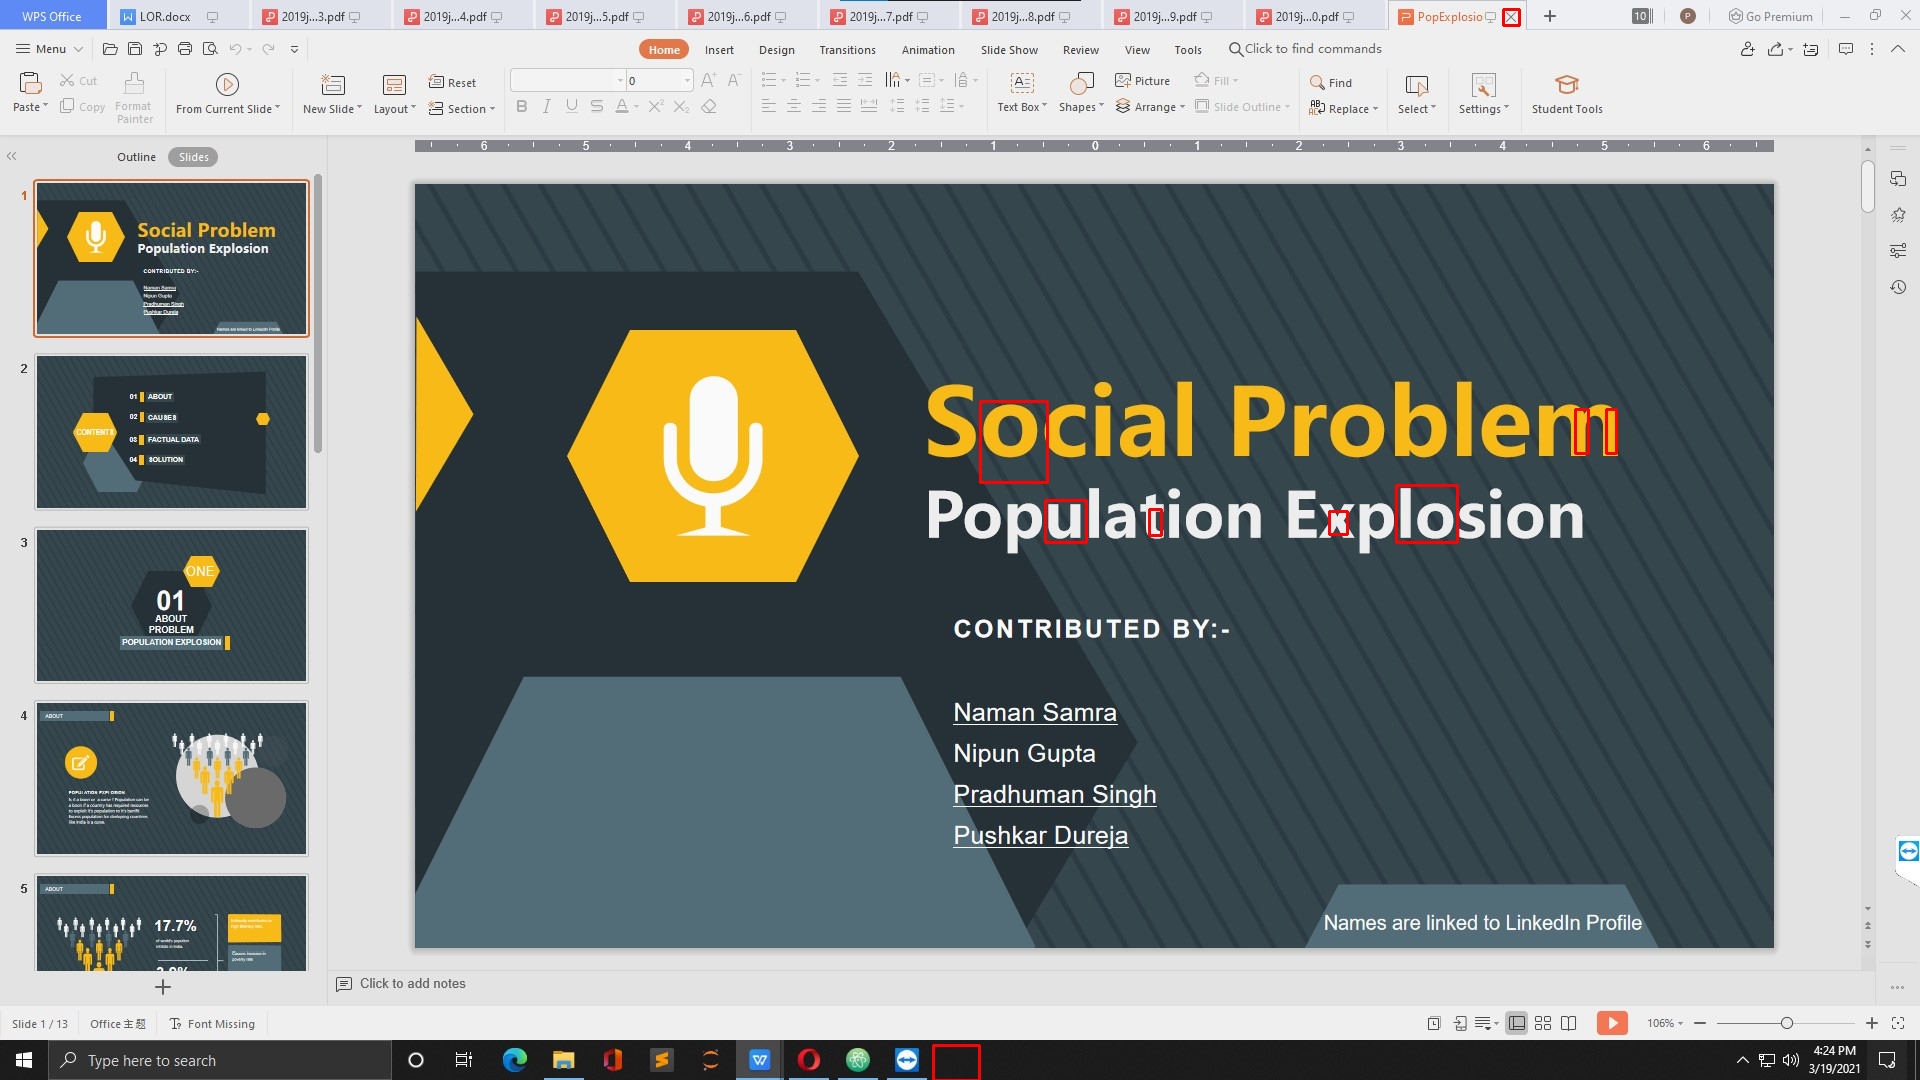

-1

In [ ]:
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  if w>9 and h>15:
    cv2.rectangle(imageA, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.rectangle(imageB, (x, y), (x+w, y+h), (0, 0, 255), 2)
  else:
    continue
cv2_imshow(imageA)
cv2.waitKey(0)

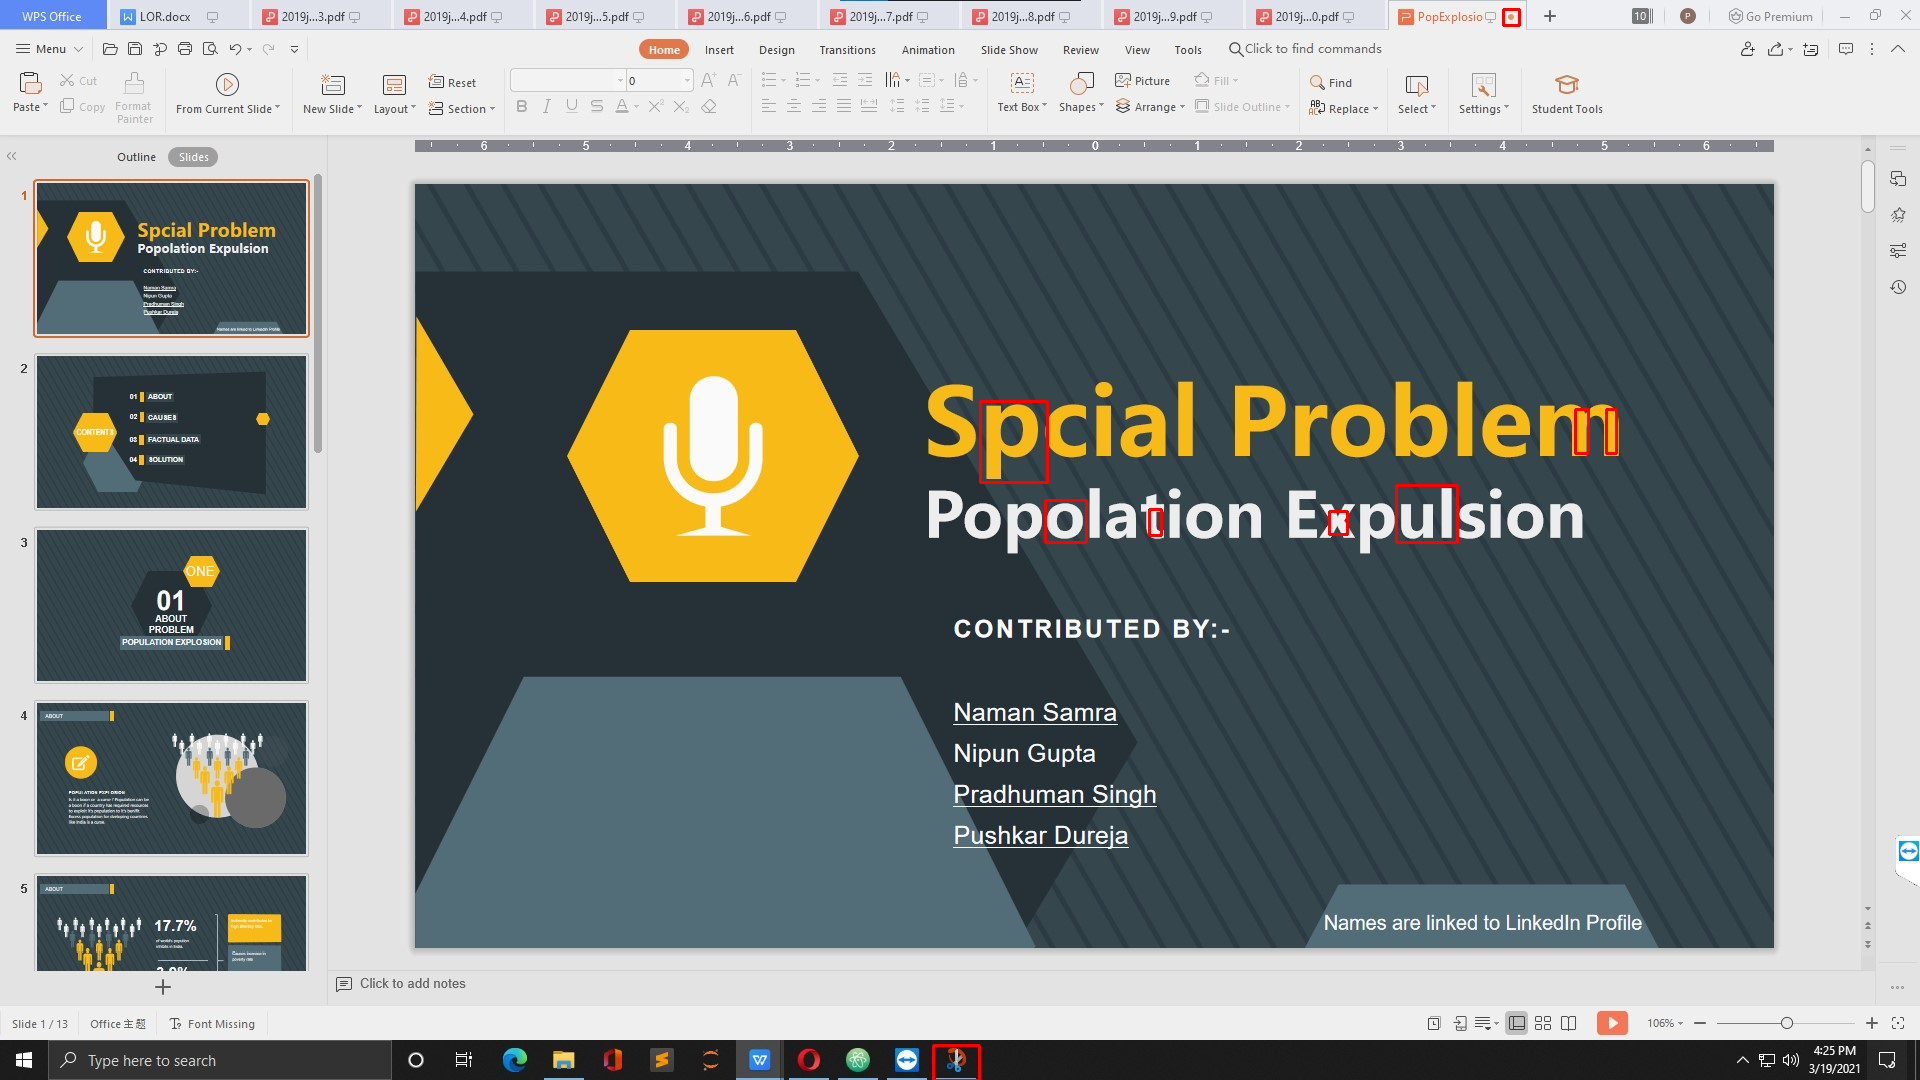

In [ ]:
cv2_imshow(imageB)


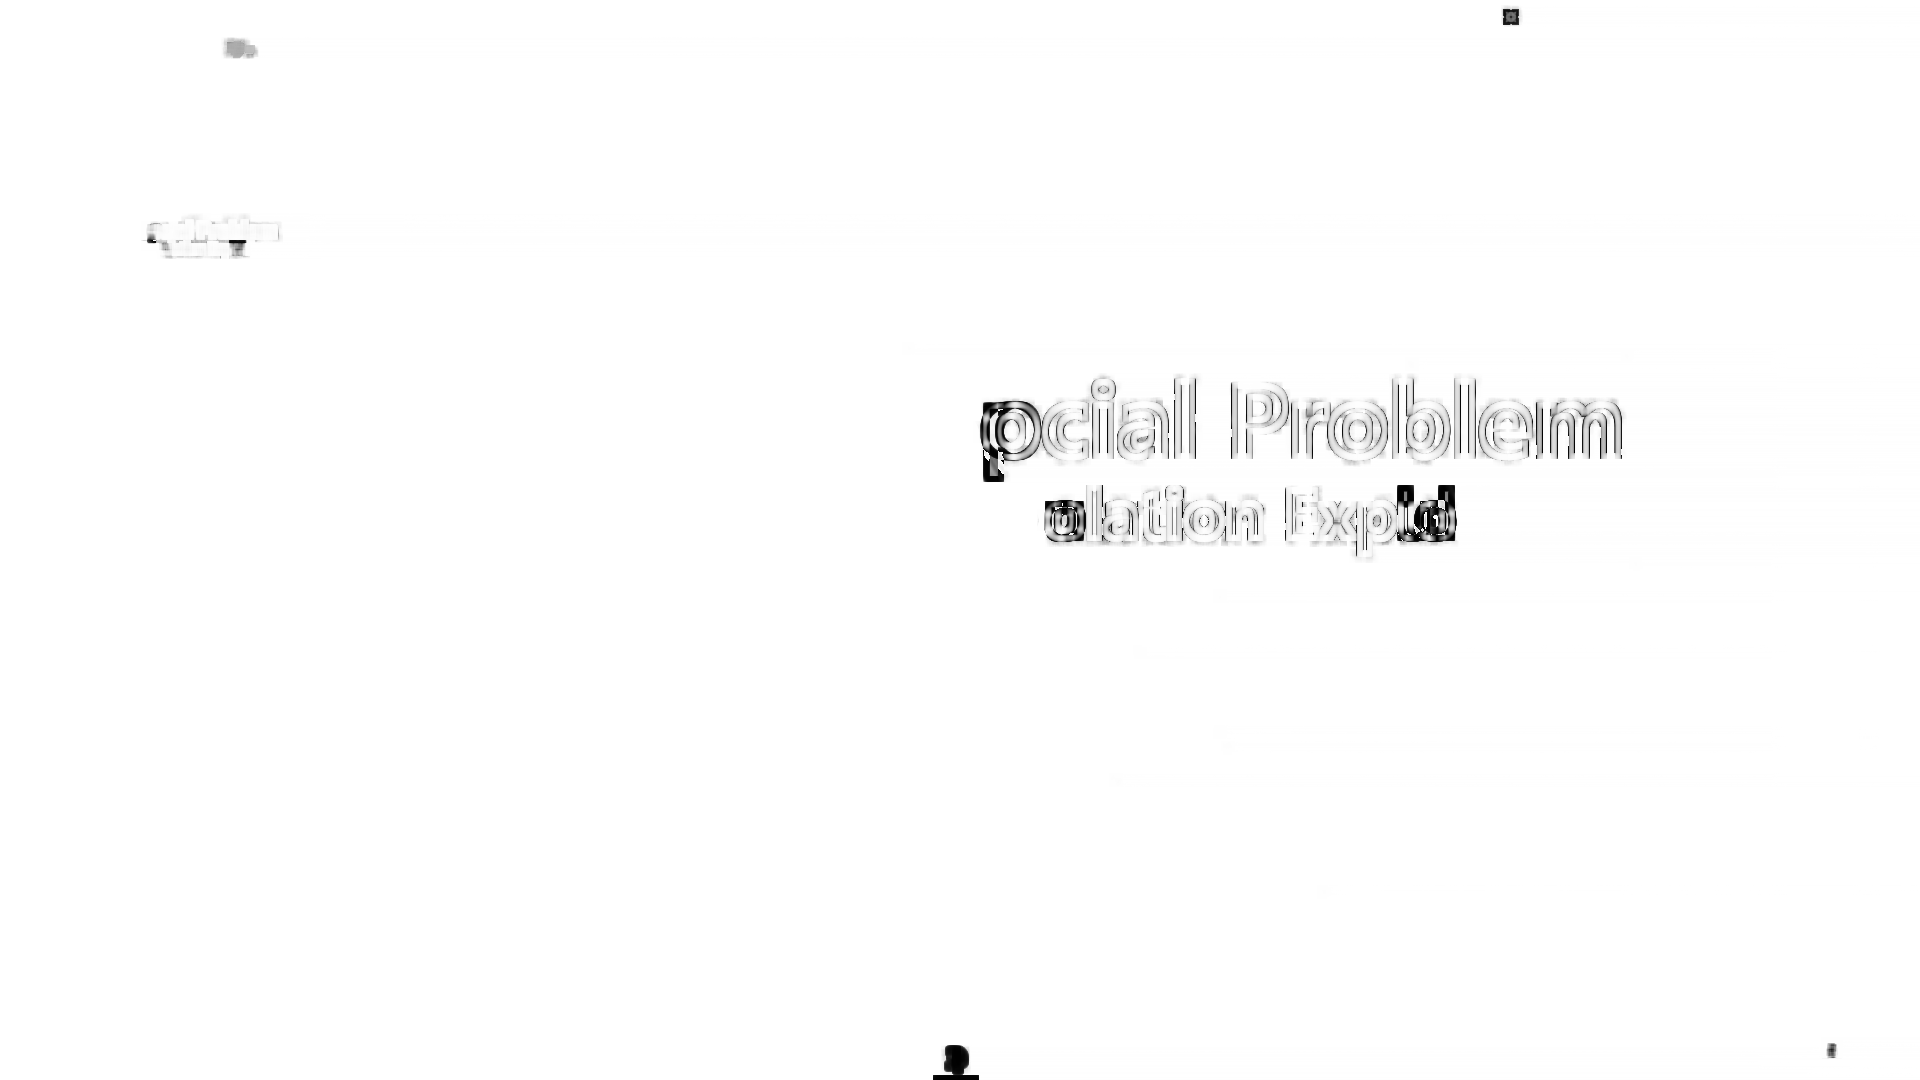

In [ ]:
cv2_imshow(diff)


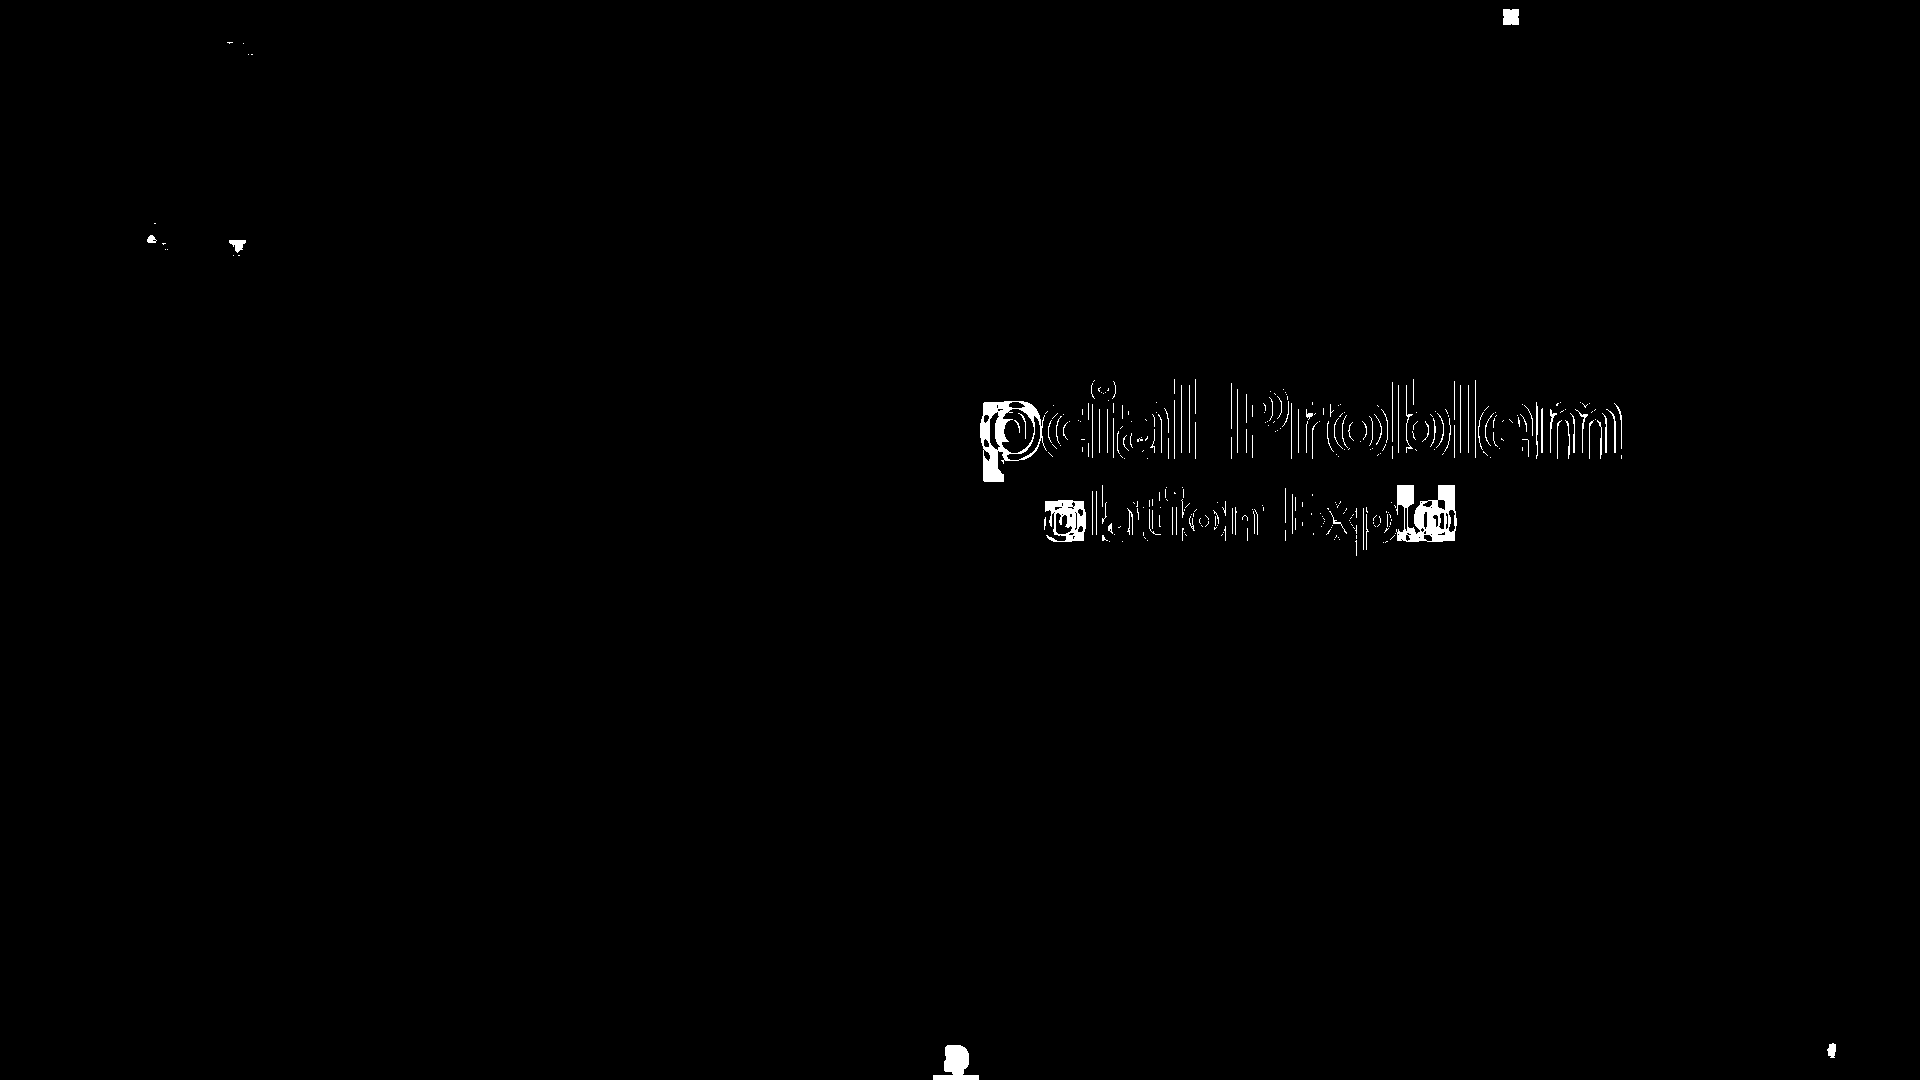

In [ ]:
cv2_imshow(thresh)